In [105]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [98]:
deaths_table

array([[12968. , 12541. , 11762. , 11056. , 10524. , 10117. , 10102. ,
        10295. ,  9981. ,  9792. ,  9729. ,  9631. ,  8004. ,  9756. ,
         9892. ,  9449. ,  9503. ,  8343. ,  9483. ,  9190. ,  9452. ,
         8178. ,  9259. ,  8513. ,  8461. ,  8973. ,  8627. ,  8541. ,
         8261. ,  8257. ,  8467. ,  8318. ,  8584. ,  8635. ,  7708. ,
         8961. ,  8727. ,  8943. ,  8759. ,  9195. ,  9218. ,  9286. ,
         9275. ,  9668. ,  9406. ,  9437. ,  9473. ,  9220. , 11193. ,
        10880. , 11484. ,  9689. ],
       [12644. , 13133. , 11438. , 10555. , 10235. , 10019. ,  9757. ,
         9433. ,  9453. ,  9648. ,  9842. ,  9707. ,  9312. ,  9557. ,
         9327. ,  8335. ,  8064. ,  9853. , 10140. ,  8949. ,  9163. ,
         7913. ,  9254. ,  8961. ,  8715. ,  8710. ,  8705. ,  8461. ,
         8500. ,  8456. ,  8787. ,  8573. ,  8426. ,  8466. ,  7717. ,
         8769. ,  8612. ,  8527. ,  8919. ,  8719. ,  8705. ,  8638. ,
         9139. ,  9640. ,  9042. ,  9305.

In [0]:
years = list(range(2010,2021))
deaths_table = np.zeros((len(years),52))

In [0]:
for i in range(len(years)):
    yr = years[i]
    after_16 = yr >= 2016
    filename = glob(f"publishedweek*{yr}*.xls*")[0]
    sheet = 4 if yr == 2020 else 3
    row = 7 if yr == 2020 else 6
    year_data = pd.read_excel(filename, sheet_name=sheet)
    deaths_table[i] = year_data.iloc[row,1 + int(after_16):53 + int(after_16)]

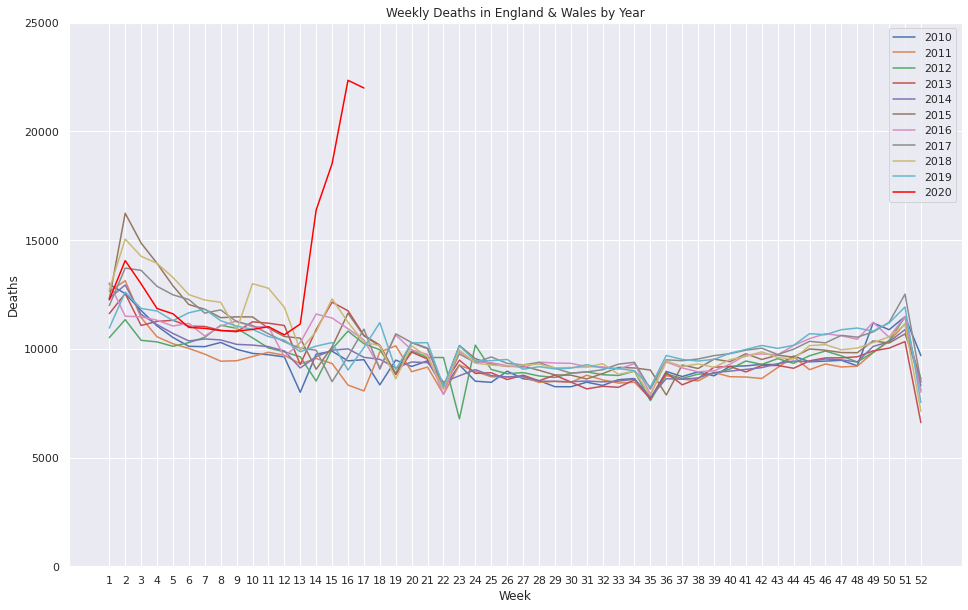

In [117]:
fig,ax = plt.subplots(figsize=(16,10))
for i in range(len(years)):
    color = "red" if years[i] == 2020 else None
    plt.plot(range(1,53), deaths_table[i], label=years[i], color=color)
plt.legend()
plt.xticks(range(1,53))
plt.ylim(0,25000)
plt.title("Weekly Deaths in England & Wales by Year")
plt.xlabel("Week")
plt.ylabel("Deaths")
plt.savefig("Deaths.png")
plt.show()